In [1]:
# -------------------------------
# Task 2: Customer Segmentation
# Dataset: Mall Customer (Kaggle)
# -------------------------------

# 0) Imports
import pandas as pd                 # dataframes
import numpy as np                  # numeric operations
import matplotlib.pyplot as plt     # plotting
import seaborn as sns               # nicer plots
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples


pandas → for handling dataset

matplotlib & seaborn → for visualization

KMeans → clustering algorithm from scikit-learn

StandardScaler → normalize features before clustering

In [3]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Select features

In [4]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]


We only use income and spending score for clustering (2D makes visualization easier).

# Scale features

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Normalizes values so that income and spending score have equal weight.

# Elbow method

In [6]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


Tests different cluster counts (k=1…10).

inertia = how tight clusters are → used to find best k.

# Apply KMeans

In [7]:
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)


Chooses 5 clusters (from elbow plot).

Assigns each customer to a cluster (Cluster column).

# Visualize clusters

<Figure size 800x600 with 0 Axes>

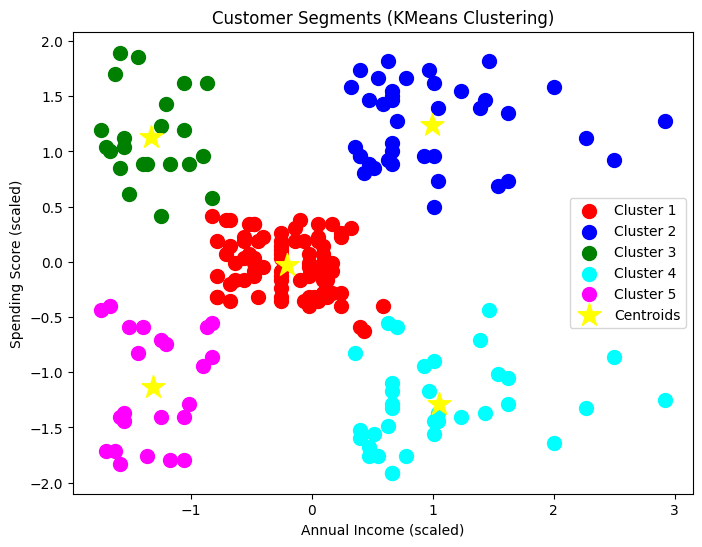

In [9]:
import matplotlib.pyplot as plt

# Visualizing the KMeans clusters
plt.figure(figsize=(8,6))

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)   # ✅ now df_scaled is defined

# Step 8: Apply KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(df_scaled)

# Plot clusters in 2D
plt.figure(figsize=(8,6))

plt.scatter(df_scaled[y_kmeans == 0, 0], df_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(df_scaled[y_kmeans == 1, 0], df_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(df_scaled[y_kmeans == 2, 0], df_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(df_scaled[y_kmeans == 3, 0], df_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(df_scaled[y_kmeans == 4, 0], df_scaled[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='*', label='Centroids')

plt.title("Customer Segments (KMeans Clustering)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()



# 3D Visualization (using Age, Income, Spending Score)

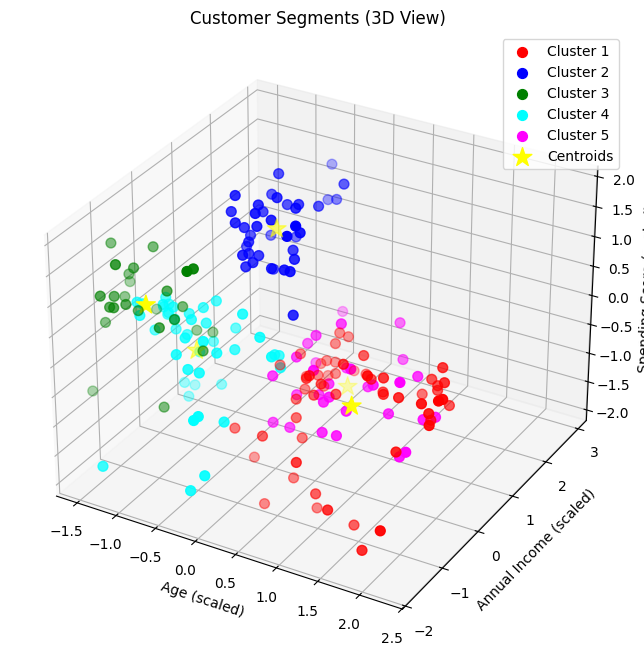

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# Select 3 features for 3D clustering
X3 = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Scale
df_scaled3 = scaler.fit_transform(X3)

# Fit KMeans
kmeans3 = KMeans(n_clusters=5, random_state=42)
y_kmeans3 = kmeans3.fit_predict(df_scaled3)

# 3D Plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_scaled3[y_kmeans3 == 0, 0], df_scaled3[y_kmeans3 == 0, 1], df_scaled3[y_kmeans3 == 0, 2], s=50, c='red', label='Cluster 1')
ax.scatter(df_scaled3[y_kmeans3 == 1, 0], df_scaled3[y_kmeans3 == 1, 1], df_scaled3[y_kmeans3 == 1, 2], s=50, c='blue', label='Cluster 2')
ax.scatter(df_scaled3[y_kmeans3 == 2, 0], df_scaled3[y_kmeans3 == 2, 1], df_scaled3[y_kmeans3 == 2, 2], s=50, c='green', label='Cluster 3')
ax.scatter(df_scaled3[y_kmeans3 == 3, 0], df_scaled3[y_kmeans3 == 3, 1], df_scaled3[y_kmeans3 == 3, 2], s=50, c='cyan', label='Cluster 4')
ax.scatter(df_scaled3[y_kmeans3 == 4, 0], df_scaled3[y_kmeans3 == 4, 1], df_scaled3[y_kmeans3 == 4, 2], s=50, c='magenta', label='Cluster 5')

# Centroids in 3D
ax.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], kmeans3.cluster_centers_[:, 2],
           s=200, c='yellow', marker='*', label='Centroids')

ax.set_title("Customer Segments (3D View)")
ax.set_xlabel("Age (scaled)")
ax.set_ylabel("Annual Income (scaled)")
ax.set_zlabel("Spending Score (scaled)")
ax.legend()
plt.show()
